## MyoPal Sensor Fit Solutions
Author: M Delph
Date: 29 APL 2020

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from scipy import signal
# Polynomial = np.polynomial.Polynomial
%matplotlib inline
import math

font = {'family' : 'sans-serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

## Purpose

The purpose of this script is to explore different options of fitting the IR Sled position to the Encoder Joint position.  The output of this script will be various equations to best fit the sled sensor values to the joint sensor values.

## Data Import

In [114]:
loc = 'C:/Users/MichaelDelph/Documents/Python Playground/'
file_name = 'SensorMapping.csv'
input_file = loc + file_name


df_raw = pd.read_csv(input_file, header=0, dtype=np.float64)
# print (df_raw.columns)


  
Sled = df_raw["Sled"].values
Joint = df_raw['Joint'].values
N_Fit = df_raw['N_Fit'].values

# print(Sled[5])

## Polynomial Fit

MD Poly Fit Equation:
            3           2
-0.0002029 x + 0.03032 x - 0.07099 x + 2.126


Text(0.5, 1.0, 'Sled to IR Mapping')

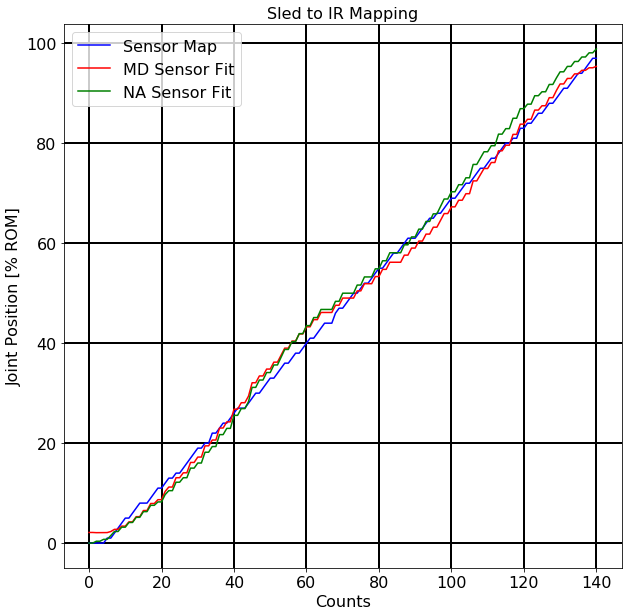

In [127]:

deg_poly = 3

MD_fit= np.polyfit(Sled, Joint, deg_poly)
MD_Fit_Curve = np.poly1d(MD_fit)(Sled)

# print('Raw fit results:', pfit, stats, sep='\n')
# print('Raw fit results:', MD_fit)
print('MD Poly Fit Equation:')
print(np.poly1d(MD_fit))

# A5,A4,A3,A2,A1,A0, m = pfit
# resid, rank, sing_val, rcond = stats
# rms = np.sqrt(resid[0]/len(Sled))

# print('Fit: A = {:.3f}[P] + {:.3f}'.format(m, A0),
#       '(rms residual = {:.4f})'.format(rms))


# Sled_min = min(Sled)
# Sled_max = max(Sled)

############### Plot ##################
plt.figure(figsize=(10,10))
plt.plot(Joint, 'b') # Collected Joint data
plt.plot(MD_Fit_Curve, color='r') # MD Polynomial Fit
plt.plot(N_Fit, color='g') # NA Sine Fit
plt.legend(['Sensor Map','MD Sensor Fit','NA Sensor Fit'])
plt.xlabel('Counts')
plt.ylabel('Joint Position [% ROM]')
plt.grid(color='k', linestyle='-', linewidth=2)
plt.title("Sled to IR Mapping", fontsize = 16)



## Error Compare

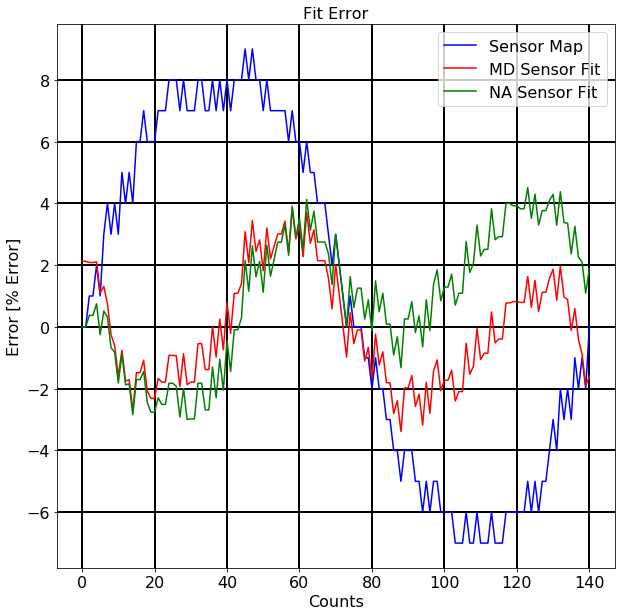

In [128]:
Sensor_Error = Sled - Joint ## Current Error between the sensors (no Adjustment)
MD_Fit_Error = MD_Fit_Curve - Joint ## Error from Polynomial Fit
NA_Fit_Error = N_Fit - Joint ## Error from Sine Fit


############## Plot #################

plt.figure(figsize=(10,10))
plt.plot(Sensor_Error, 'b')
plt.plot(MD_Fit_Error,'r')
plt.plot(NA_Fit_Error,'g')
plt.xlabel('Counts')
plt.ylabel('Error [% Error]')
plt.grid(color='k', linestyle='-', linewidth=2)
plt.title("Fit Error", fontsize = 16)
plt.legend(['Sensor Map','MD Sensor Fit','NA Sensor Fit'])